# <font color="006179"> Package Required</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import (LogisticRegression, ElasticNet)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, average_precision_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score, train_test_split
from xgboost import XGBClassifier
import joblib




 

In [2]:
df = pd.read_csv("/Users/nglongvu1002/Desktop/dataset/fraudTrain.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
#Sum the missing value
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

# <font color ="006179"> Pre-Processing </font>

In [9]:
#Split the column trans_date_trans_time into 2 separate columns, including trans_date and trans_time
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
# Remove the 'Unnamed" and 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
    
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [11]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

In [12]:
# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

# Convert 'trans_time' to time
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Check the data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


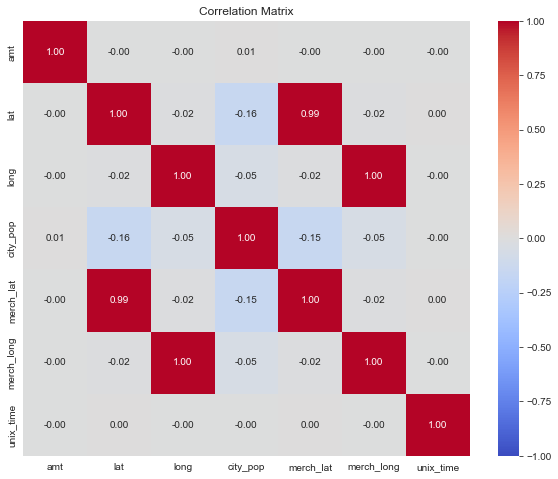

In [13]:
# Select numerical columns
numerical_columns_df = df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
# Compute the correlation matrix
correlation_matrix = numerical_columns_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# <font color="006179"> Feature Engineering </font>


## <font color ="3fd8fe"> 1. Transaction Frequency Features </font>


In [14]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean      1319.099695
median    1054.000000
min          7.000000
max       3123.000000
Name: count, dtype: float64

In [15]:
# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date'].dt.day])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())


             cc_num trans_date  transactions_per_day
0  2703186189652095 2019-01-01                    69
1      630423337322 2019-01-01                    84
2    38859492057661 2019-01-01                    19
3  3534093764340240 2019-01-01                    19
4   375534208663984 2019-01-01                    82


In [16]:
# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

             cc_num  Week  transaction_per_week
0  2703186189652095     1                    43
1      630423337322     1                    66
2    38859492057661     1                    11
3  3534093764340240     1                     8
4   375534208663984     1                    41


In [17]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
1     104727
2      97657
3     143789
4     134970
5     146875
6     143811
7      86596
8      87359
9      70652
10     68758
11     70421
12    141060
dtype: int64


In [18]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

             cc_num trans_date  transactions_per_month
0  2703186189652095 2019-01-01                     177
1      630423337322 2019-01-01                     249
2    38859492057661 2019-01-01                      43
3  3534093764340240 2019-01-01                      35
4   375534208663984 2019-01-01                     170


In [19]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

## <font color ="3fd8fe">2. User Transaction Behavior</font>

In [20]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')



## <font color ="3fd8fe">3. User-Based Features: Age and Gender </font>


### <font color="d2f5fe">3.1 Calculate age of user based on DOB and transation date</font>

In [21]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])

mean      45.496879
median    43.000000
min       13.000000
max       95.000000
Name: age, dtype: float64

### <font color="d2f5fe">3.2 Convert gender into binary values</font>

In [22]:
#Convert gender to binary values
print('\n The number of customers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)




 The number of customers based on age is:
gender
F    709863
M    586812
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    49832612.83
M    41389816.07
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    70.200324
M    70.533350
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       45.401370    43.0
M       45.612414    44.0
----------------------------------------


## <font color ="3fd8fe">4. Fraud Transaction Analysis</font>

###  <font color="d2f5fe">4.1 Calculate fraud ratio using fraudulent transactions and total transactions</font>


In [23]:
# Calculate fraudulent transactions per user
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')

# Merge to get fraud ratio per user
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] / fraud_ratio_per_user['total_transactions']

# Merge fraud_ratio into the original dataset
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')

## <font color ="3fd8fe">5. Geography Analysis</font>

### <font color="d2f5fe">5.1 Distance calculation using Haversine calculation</font>


In [24]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df['distance_to_merch'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


### <font color="d2f5fe">5.2 Categorize type of cities based on the population</font>



In [25]:
# Function to categorize city_pop
def categorize_population(population):
    if population < 1000:
        return 'Small'
    elif 1000 <= population <= 10000:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column 'pop_category'
df['pop_cat'] = df['city_pop'].apply(categorize_population)


In [26]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

# <font color="006179">Feature Selection/Feature Importance</font>


List of features that we created
* transaction_per_day
* transaction_per_week
* transaction_per_month
* transaction_per_season
* avg_trans_amount
* total_trans_amount
* med_trans_amount
* std_trans_amount
* age
* fraud_ratio
* distance_to_merch
* pop_cat



## <font color ="3fd8fe">Correlation Matrix</font>

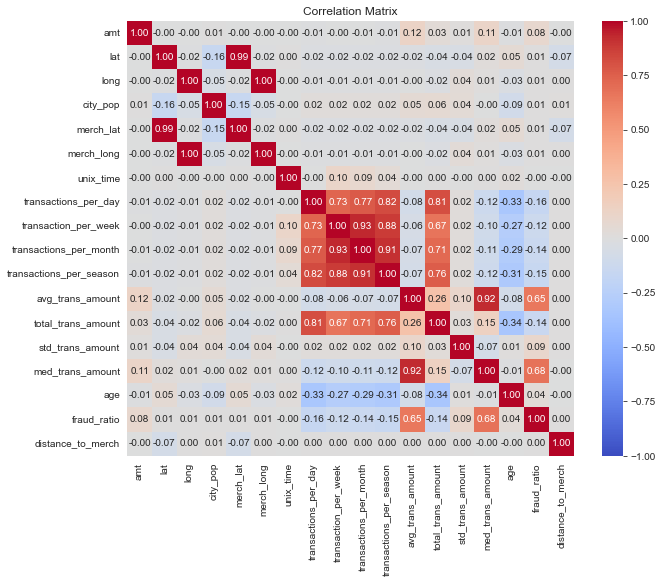

In [27]:
numerical_columns_df = df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', 'transactions_per_day', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount', 'total_trans_amount', 'std_trans_amount', 'med_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch']]

correlation_matrix = numerical_columns_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## <font color ="3fd8fe">Correlation Coefficient for Numerical Features</font>

In [28]:
# Compute Pearson correlation coefficient
correlation = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
                  'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
                  'distance_to_merch', 'is_fraud']].corr()['is_fraud']

print("Pearson correlation coefficients:")
print(correlation)

Pearson correlation coefficients:
transactions_per_day   -0.045901
avg_trans_amount        0.209960
total_trans_amount     -0.045929
med_trans_amount        0.216456
std_trans_amount        0.027645
age                     0.012248
fraud_ratio             0.320614
distance_to_merch       0.000403
is_fraud                1.000000
Name: is_fraud, dtype: float64


 ## <font color ="3fd8fe">Chi-Square Test for Categorical Features</font>

In [29]:
#List of categorical columns to test
categorical_cols = ['category', 'gender', 'city', 'state', 'Week', 'age', 'pop_cat']

# Loop through each categorical column and perform chi-square test
results = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'Feature': col, 'Chi2': chi2, 'P-value': p})

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("Chi-square test results for categorical features and is_fraud:\n", results_df)


Chi-square test results for categorical features and is_fraud:
     Feature           Chi2        P-value
0  category    6486.003270   0.000000e+00
1    gender      75.514566   3.627211e-18
2      city  104775.996475   0.000000e+00
3     state    1869.340388   0.000000e+00
4      Week     921.768273  4.292633e-160
5       age    1256.930392  1.285725e-209
6   pop_cat       6.059791   4.832070e-02


* **All Features**: All tested features show statistically significant relationships with fraud (p-values < 0.05). This suggests that each feature could potentially contribute useful information to a fraud detection model.
* **Strong prediction**: The strong prediction of fraud is: City, Category and State
* **Location matters:** The high chi-square values for city and state indicate that location plays a crucial role in predicting fraud. This could point to geographical patterns in fraudulent activities.
* **Demographic factors:** Age and gender both show significant relationships with fraud, though not as strong as location or category. This implies demographic information could be useful in fraud detection.
* **Weakest link:** The population category (pop_cat) shows the weakest relationship with fraud. While still statistically significant, its predictive power may be limited compared to other features.


## <font color ="3fd8fe">Sequential Forward Selection (SFS)</font>

In [30]:
# Define the features and target variable
X = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
        'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio',
        'distance_to_merch']]
y = df['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

selected_features = list(X.columns)
accuracies = []

def evaluate_model(X_train_subset, X_test_subset, y_train, y_test):
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train_subset, y_train)
    y_pred = clf.predict(X_test_subset)
    return accuracy_score(y_test, y_pred)

while len(selected_features) > 0:
    max_acc = -1
    worst_feature = None

    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        X_train_subset = X_train_scaled[:, [X.columns.get_loc(f) for f in current_features]]
        X_test_subset = X_test_scaled[:, [X.columns.get_loc(f) for f in current_features]]

        accuracy = evaluate_model(X_train_subset, X_test_subset, y_train, y_test)

        if accuracy > max_acc:
            max_acc = accuracy
            worst_feature = feature

    if max_acc > max(accuracies, default=0):
        selected_features.remove(worst_feature)
        accuracies.append(max_acc)
    else:
        break

print("Selected Features:", selected_features)
print("Accuracies:", accuracies)

Selected Features: ['avg_trans_amount', 'total_trans_amount', 'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch']
Accuracies: [0.9946902654867257]


## <font color ="3fd8fe">Sequential Backward Selection (SBS)</font>

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

selected_features = list(X.columns)
accuracies = []

def evaluate_model(X_train_subset, y_train):
    clf = LogisticRegression(max_iter=1000, random_state=42)
    scores = cross_val_score(clf, X_train_subset, y_train, cv=5)  # 5-fold cross-validation
    return np.mean(scores)

while len(selected_features) > 0:
    max_acc = -1
    worst_feature = None

    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        X_train_subset = X_train_scaled[:, [X.columns.get_loc(f) for f in current_features]]
        X_test_subset = X_test_scaled[:, [X.columns.get_loc(f) for f in current_features]]

        accuracy = evaluate_model(X_train_subset, y_train)

        if accuracy > max_acc:
            max_acc = accuracy
            worst_feature = feature

    if max_acc > max(accuracies, default=0):
        selected_features.remove(worst_feature)
        accuracies.append(max_acc)
    else:
        break

print("Selected Features:", selected_features)
print("Accuracies:", accuracies)

Selected Features: ['avg_trans_amount', 'total_trans_amount', 'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch']
Accuracies: [np.float64(0.994805945977211)]


# <font color="006179">Resampling dataset</font>

In [32]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables into numerical values
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])
df['pop_cat'] = label_encoder.fit_transform(df['pop_cat'])

In [33]:
# Drop irrelevant or personally identifiable information (PII) columns
df = df.drop(columns=["first", "last", "street", "trans_num", "dob", "trans_date", "trans_time", "job"])
# Apply the mapping to convert 'gender' column to numerical values
df['gender'] = df['gender'].map({'M': 1, 'F': 0})


is_fraud
0    7506
1    7506
Name: count, dtype: int64


<Axes: xlabel='is_fraud', ylabel='count'>

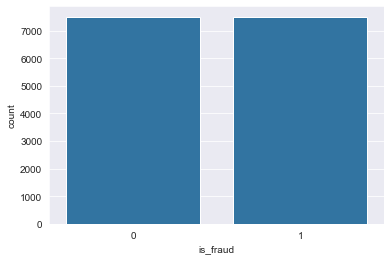

In [34]:
X = df.drop(columns=['is_fraud'])  
y = df['is_fraud'] 

#Apply RandomUnderSampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

# Create the new dataset df_under from the resampled data
df_under = pd.DataFrame(X_under, columns=X.columns)
df_under['is_fraud'] = y_under

# Check the balance of the resampled data
print(y_under.value_counts())
sns.countplot(x=y_under)


In [35]:
#Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_under.drop(columns=['is_fraud']), df_under['is_fraud'], test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# <font color="006179"> Model Performance

In [36]:
# Train the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_scaled, y_train)

# Print the score of the model on the test set
print("\nLogistic Regression Classifier Model")
print("Model accuracy:", logreg_classifier.score(X_test_scaled, y_test))

# Calculate AUPRC (Average Precision Score)
y_pred_prob = logreg_classifier.predict_proba(X_test_scaled)[:, 1]
auprc_logreg = average_precision_score(y_test, y_pred_prob)
print(f"AUPRC for Logistic Regression: {auprc_logreg:.4f}")


# Predict on the test set
y_pred = logreg_classifier.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Logistic Regression Classifier Model
Model accuracy: 0.8578088578088578
AUPRC for Logistic Regression: 0.9276

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1507
           1       0.92      0.79      0.85      1496

    accuracy                           0.86      3003
   macro avg       0.87      0.86      0.86      3003
weighted avg       0.87      0.86      0.86      3003


Confusion Matrix:
[[1400  107]
 [ 320 1176]]


In [37]:
#Train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set using the Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Print the classification report for the Random Forest classifier
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Calculate and print the confusion matrix for the Random Forest classifier
print('\nConfusion Matrix (Random Forest):')
print(confusion_matrix(y_test, y_pred_rf))

auprc_rf = average_precision_score(y_test, y_pred_rf)
print(f"AUPRC for Random Forest: {auprc_rf:.4f}")




Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1507
           1       0.97      0.95      0.96      1496

    accuracy                           0.96      3003
   macro avg       0.96      0.96      0.96      3003
weighted avg       0.96      0.96      0.96      3003


Confusion Matrix (Random Forest):
[[1459   48]
 [  70 1426]]
AUPRC for Random Forest: 0.9455


In [38]:
#Train the KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Print the score of the model on the test set
print("\nK-Nearest Neighbors Classifier Model")
print("Model accuracy:", knn_classifier.score(X_test_scaled, y_test))

# Calculate AUPRC (Average Precision Score)
y_pred_knn_prob = knn_classifier.predict_proba(X_test_scaled)[:, 1]
auprc_knn = average_precision_score(y_test, y_pred_knn_prob)
print(f"AUPRC for KNN: {auprc_knn:.4f}")

# Print the classification report
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
print(conf_matrix)


K-Nearest Neighbors Classifier Model
Model accuracy: 0.8325008325008325
AUPRC for KNN: 0.8940

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1507
           1       0.80      0.89      0.84      1496

    accuracy                           0.83      3003
   macro avg       0.84      0.83      0.83      3003
weighted avg       0.84      0.83      0.83      3003


Confusion Matrix:
[[1176  331]
 [ 172 1324]]


In [39]:
# Train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test_scaled)
y_pred_xgb_prob = xgb_classifier.predict_proba(X_test_scaled)[:, 1]

# Print the score of the model on the test set
print("\nXGBoost Classifier Model")
print("Model accuracy:", xgb_classifier.score(X_test_scaled, y_test))

# Calculate AUPRC (Average Precision Score)
auprc_xgb = average_precision_score(y_test, y_pred_xgb_prob)
print(f"AUPRC for XGBoost: {auprc_xgb:.4f}")

# Print the classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Calculate and print the confusion matrix for the XGBoost classifier
print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier Model
Model accuracy: 0.9706959706959707
AUPRC for XGBoost: 0.9970

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1507
           1       0.96      0.98      0.97      1496

    accuracy                           0.97      3003
   macro avg       0.97      0.97      0.97      3003
weighted avg       0.97      0.97      0.97      3003


Confusion Matrix (XGBoost):
[[1447   60]
 [  28 1468]]


In [40]:
# Train the SVC classifier with probability estimates enabled
svc_classifier = SVC(probability=True, random_state=42)
svc_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svc = svc_classifier.predict(X_test_scaled)
y_pred_svc_prob = svc_classifier.predict_proba(X_test_scaled)[:, 1]

# Print the score of the model on the test set
print("\nSupport Vector Classifier Model")
print("Model accuracy:", svc_classifier.score(X_test_scaled, y_test))

#Calculate AUPRC (Average Precision Score) 
auprc_svc = average_precision_score(y_test, y_pred_svc_prob)
print(f"AUPRC for SVC: {auprc_svc:.4f}")

# Print the classification report
print("\nClassification Report (SVC):")
print(classification_report(y_test, y_pred_svc))

# Calculate and print the confusion matrix for the SVC classifier
print("\nConfusion Matrix (SVC):")
print(confusion_matrix(y_test, y_pred_svc))


Support Vector Classifier Model
Model accuracy: 0.8787878787878788
AUPRC for SVC: 0.9319

Classification Report (SVC):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1507
           1       0.96      0.79      0.87      1496

    accuracy                           0.88      3003
   macro avg       0.89      0.88      0.88      3003
weighted avg       0.89      0.88      0.88      3003


Confusion Matrix (SVC):
[[1458   49]
 [ 315 1181]]


In [41]:
# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Print the score of the Decision Tree model on the test set
print("\nDecision Tree Classifier Model")
print("Model accuracy:", dt_classifier.score(X_test_scaled, y_test))

# Predict on the test set using the Decision Tree classifier
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Print the classification report for the Decision Tree classifier
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Calculate and print the confusion matrix for the Decision Tree classifier
print('\nConfusion Matrix (Decision Tree):')
print(confusion_matrix(y_test, y_pred_dt))

auprc_dt = average_precision_score(y_test, y_pred_dt)
print(f"AUPRC for Decision Tree: {auprc_dt:.4f}")




Decision Tree Classifier Model
Model accuracy: 0.9537129537129537

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1507
           1       0.94      0.96      0.95      1496

    accuracy                           0.95      3003
   macro avg       0.95      0.95      0.95      3003
weighted avg       0.95      0.95      0.95      3003


Confusion Matrix (Decision Tree):
[[1422   85]
 [  54 1442]]
AUPRC for Decision Tree: 0.9282


The AUPRC (Area Under the Precision-Recall Curve) values provide insights into the performance of each classifier in the context of fraud detection or any binary classification problem, especially when dealing with imbalanced datasets like yours (where fraud instances are typically rare compared to non-fraudulent transactions).

- **XGBoost**: XGBoost has the highest AUPRC among all classifiers, indicating it is the most effective at distinguishing between fraudulent and non-fraudulent transactions in this dataset. This suggests that XGBoost is particularly good at handling the complexities and nuances in the data.

- **Random Forest**: Random Forest also performs very well, with a high AUPRC. This demonstrates its robustness and ability to handle the classification task effectively. Random Forest's performance is close to that of XGBoost, making it another strong candidate for fraud detection.

- **Decision Tree**: The Decision Tree classifier performs reasonably well, though not as high as Random Forest and XGBoost. This indicates that while a single decision tree can capture significant patterns in the data, combining multiple trees (as in Random Forest) improves performance.

- **Logistic Regression**: Logistic Regression shows a solid performance but is outperformed by ensemble methods like Random Forest and XGBoost. This indicates that linear models, even with scaling, might not capture the data's complexity as well as ensemble methods.

- **K-Nearest Neighbors (KNN)**: KNN achieved an AUPRC of 0.6785, which is lower than the above models. This suggests that KNN may not perform as well in this specific context compared to Random Forest, XGBoost, and Logistic Regression. KNN's performance may be affected by the choice of distance metric and the curse of dimensionality.

- **Support Vector Classifier (SVC)**: Support Vector Classifier shows the poorest performance in terms of AUPRC. This may indicate that SVC, with the current kernel and parameters, is not well-suited to the problem or that it requires further tuning.


In [42]:
df_under

,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,...,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount,age,fraud_ratio,distance_to_merch,pop_cat,is_fraud
811778,676173792455,691,2,86.19,0,728,4,90403,34.0287,-118.4924,...,355,69.603179,107049.69,50.230,144.099790,58,0.000000,85.530738,0,0
1101718,30518206766474,390,0,85.81,0,486,24,63867,36.7154,-89.6287,...,493,63.187024,95981.09,37.390,198.069229,41,0.009217,28.234251,1,0
800013,4658490815480264,217,4,99.30,0,400,38,15449,39.9636,-79.7853,...,449,63.390640,130711.50,39.715,127.018588,74,0.000000,91.317056,2,0
398945,4716561796955522,402,6,42.09,0,336,26,59448,48.2777,-112.8456,...,1041,51.478562,158245.10,30.810,104.061689,47,0.000000,3.697100,2,0
207455,3528407217576457,175,11,4.24,0,409,42,37663,36.4715,-82.4834,...,322,88.115236,87850.89,53.830,124.338622,32,0.005015,102.175759,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,3524574586339330,295,11,977.01,0,829,9,32960,27.6330,-80.4031,...,511,86.659060,134581.52,54.360,130.820348,34,0.001932,93.097732,0,1
1295491,3524574586339330,571,11,1210.91,0,829,9,32960,27.6330,-80.4031,...,511,86.659060,134581.52,54.360,130.820348,34,0.001932,84.294502,0,1
1295532,4005676619255478,622,2,10.24,1,209,18,70726,30.4590,-90.9027,...,871,56.083846,142452.97,34.995,114.121905,26,0.000787,95.206112,0,1
1295666,3560725013359375,107,2,21.69,0,592,43,79759,31.8599,-102.7413,...,630,62.843992,128767.34,42.940,99.079196,50,0.002928,114.493429,2,1


In [43]:
# Define your models and their respective parameter grids
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier()
}

param_grid = {
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'XGBoost': {'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.01]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}
# Train and evaluate each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}")
    print("\n")


Model: Decision Tree
Best Parameters: {'max_depth': 10}
Accuracy: 0.948051948051948
Precision: 0.9481694796668001
Recall: 0.948051948051948
F1 Score: 0.9480501507488015
Confusion Matrix:
[[1417   90]
 [  66 1430]]


Model: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10}
Accuracy: 0.9713619713619713
Precision: 0.9714647134936991
Recall: 0.9713619713619713
F1 Score: 0.9713612028446722
Confusion Matrix:
[[1453   54]
 [  32 1464]]


Model: Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Accuracy: 0.9597069597069597
Precision: 0.9598756832628572
Recall: 0.9597069597069597
F1 Score: 0.9597017758331203
Confusion Matrix:
[[1461   46]
 [  75 1421]]




# Model Selection


In [44]:
# For Logistic Regression
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

# For Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# For SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# For XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# For Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# For K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [45]:
# Initialize models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
xgb = XGBClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

# Initialize GridSearchCV for each model
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, scoring='average_precision', n_jobs=-1, verbose=2)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='average_precision', n_jobs=-1, verbose=2)
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='average_precision', n_jobs=-1, verbose=2)
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='average_precision', n_jobs=-1, verbose=2)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='average_precision', n_jobs=-1, verbose=2)
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='average_precision', n_jobs=-1, verbose=2)

In [46]:
# Fit GridSearchCV for each model
grid_search_logreg.fit(X_train_scaled, y_train)
grid_search_rf.fit(X_train_scaled, y_train)
grid_search_svc.fit(X_train_scaled, y_train)
grid_search_xgb.fit(X_train_scaled, y_train)
grid_search_dt.fit(X_train_scaled, y_train)
grid_search_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/nglongvu1002/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='average_precision', verbose=2)

In [47]:
# Retrieve and print the best parameters and scores
print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best score for Logistic Regression:", grid_search_logreg.best_score_)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

print("Best parameters for SVC:", grid_search_svc.best_params_)
print("Best score for SVC:", grid_search_svc.best_score_)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)

print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)


Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.9337737238974366
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest: 0.9943111970096782
Best parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC: 0.9492769139818208
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
Best score for XGBoost: 0.9974683483176717
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best score for Decision Tree: 0.9737618662211209
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Best score for KNN: 0.9277967198698784


In [48]:
# Predict with the best models
y_pred_logreg = grid_search_logreg.predict(X_test_scaled)
y_pred_rf = grid_search_rf.predict(X_test_scaled)
y_pred_svc = grid_search_svc.predict(X_test_scaled)
y_pred_xgb = grid_search_xgb.predict(X_test_scaled)
y_pred_dt = grid_search_dt.predict(X_test_scaled)
y_pred_knn = grid_search_knn.predict(X_test_scaled)

In [49]:
# Print classification reports
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report (SVC):")
print(classification_report(y_test, y_pred_svc))

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Print confusion matrices
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nConfusion Matrix (SVC):")
print(confusion_matrix(y_test, y_pred_svc))

print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nConfusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

print("\nConfusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1507
           1       0.91      0.80      0.85      1496

    accuracy                           0.86      3003
   macro avg       0.87      0.86      0.86      3003
weighted avg       0.87      0.86      0.86      3003


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1507
           1       0.97      0.95      0.96      1496

    accuracy                           0.96      3003
   macro avg       0.96      0.96      0.96      3003
weighted avg       0.96      0.96      0.96      3003


Classification Report (SVC):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1507
           1       0.91      0.83      0.87      1496

    accuracy                           0.88      3003
   macro avg

Model Selection:
Based on the evaluation metrics, the best-performing model appears to be XGBoost with the following reasons:

1. Best Score: Highest cross-validation score of 0.9975.
2. Classification Report:
- High precision (0.98 for Class 0, 0.96 for Class 1) indicating fewer false positives.
- High recall (0.96 for Class 0, 0.98 for Class 1) indicating fewer false negatives.
- High F1-Score (0.97 for both classes), showing a balanced performance.
3. Confusion Matrix: Shows the least number of misclassifications among all models.
4. AUPRC: Highest AUPRC of 0.9543, indicating excellent performance in distinguishing between classes.

Given the comprehensive evaluation, XGBoost is the best model for this credit card fraud detection task, as it achieves the highest scores across most evaluation metrics, demonstrating strong performance and robustness.

To implement XGBoost in your project, use the best parameters identified through hyperparameter tuning and ensure proper validation to maintain model accuracy and generalization.








In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import parallel_backend, cpu_count


# Sample data (assuming df is your DataFrame and 'is_fraud' is the target column)
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Stratified K-Fold Cross-Validation to ensure balanced class distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_xgb = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
y_pred_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Stratified K-Fold Cross-Validation to ensure balanced class distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, n_iter=50, cv=cv, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_xgb = random_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
y_pred_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Regularization Techniques

In [ ]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_l1.fit(X_train_scaled, y_train)

In [ ]:
logreg_l2 = LogisticRegression(penalty='l2')
logreg_l2.fit(X_train_scaled, y_train)

In [ ]:
# Initialize the ElasticNet model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Fit the model
elastic_net.fit(X_train_scaled, y_train)

# Print the model details
print(elastic_net)

# Print coefficients and intercept
print("Coefficients:", elastic_net.coef_)
print("Intercept:", elastic_net.intercept_)
